Thin disk spectra
============================

This notebook illustrates how to use the `thindisk` module to generate electromagnetic spectra of a thin accretion disk.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Add path to module

In [8]:
# thin disk module
import thindisk as disk
# progress bar
from tqdm import tqdm

## Compare two models

Compare two thin accretion disk models with different inner radii. The mass accretion rate in both models is set to $\dot{M}=10^{-3} \dot{M}_{\rm Edd}$.

In [29]:
# Parameters
angle=82.	# inclination angle in degrees
mass=10**7.6	# black hole mass in solar masses
mdot=1e-3 # mass accretion rate in Eddington units

Array of log10 frequencies in Hz

In [30]:
nu=np.linspace(10,16,50)	# lognu

In the first model, $r_{\rm in} = 3.01 r_S$ where $r_S$ is the Schwarzschild radius; in the second model, $r_{\rm in} = 30 r_S$.

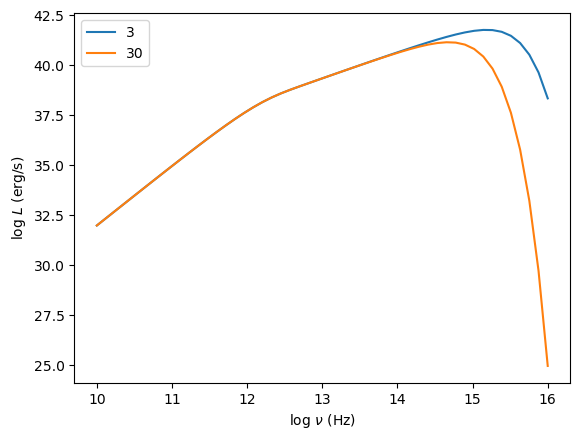

In [31]:
plt.plot(xm,disk.thindisk2(nu,mass,mdot,3.01,angle), label=3)
plt.plot(xm,disk.thindisk2(nu,mass,mdot,30,angle), label=30) 
plt.xlabel('log $\\nu$ (Hz)')
plt.ylabel('log $L$ (erg/s)')
plt.legend()

## BH mass vs peak frequency

Quick experiment to find how the black hole mass is related to the peak frequency.

Fiducial parameters

In [20]:
mass=1e7
angle=0
mdot=0.1
rtr=3.01

# frequency range
nuRange=np.linspace(8,18,200)	# lognu

### Vary mass and get peak frequencies

Range of masses

In [21]:
massGrid=np.linspace(6,9,20)

List of peak frequencies

In [22]:
peakNu=[]

In [24]:
for m in tqdm(10**massGrid):
    # frequencies
    nu=disk.thindisk2(nuRange,m,mdot,rtr,angle)

    peakNu.append(nuRange[nu.argmax()])

peakNu=np.array(peakNu)

 20%|████████▊                                   | 4/20 [00:00<00:02,  6.76it/s]/Users/nemmen/Dropbox/codes/python/thindisk/thindisk.py:179: RuntimeWarning: divide by zero encountered in log10
  ll[i]=numpy.log10(nu*lumdisk)
100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  6.97it/s]


Text(0, 0.5, '$\\log \\nu_{\\rm peak}$ (Hz)')

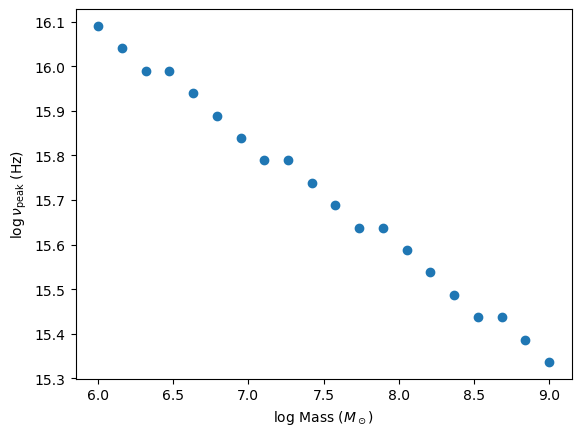

In [26]:
plt.plot(massGrid,peakNu,'o')
plt.xlabel('log Mass ($M_\odot$)')
plt.ylabel('$\log \\nu_{\\rm peak}$ (Hz)')